<a href="https://colab.research.google.com/github/mabhipsa12/Scorecard-Project/blob/main/scorecard_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Step 1: Load and Explore the Datasets

Objective:\
1) Load the application_record.csv and credit_record.csv.\
2) Check basic details like shape, missing values, and data types.



In [114]:
import pandas as pd
import numpy as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
app_df = pd.read_csv('/application_record.csv')
credit_df = pd.read_csv('/credit_record.csv')

In [116]:
# Display first 5 rows of each dataset
print("\nApplication Data Sample:")
display(app_df.head())

print("\nCredit Data Sample:")
display(credit_df.head())


Application Data Sample:


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0



Credit Data Sample:


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [117]:
# Check shape
print(f"\nApplication Data Shape: {app_df.shape}")
print(f"Credit Data Shape: {credit_df.shape}")



Application Data Shape: (438557, 18)
Credit Data Shape: (1048575, 3)


In [118]:
# Check missing values
print("\nMissing Values in Application Data:")
print(app_df.isnull().sum())

print("\nMissing Values in Credit Data:")
print(credit_df.isnull().sum())



Missing Values in Application Data:
ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

Missing Values in Credit Data:
ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64


In [119]:
# Check column types
print("\nData Types in Application Data:")
print(app_df.dtypes)

print("\nData Types in Credit Data:")
print(credit_df.dtypes)


Data Types in Application Data:
ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

Data Types in Credit Data:
ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object


🔹 Findings from Data Exploration

*   The OCCUPATION_TYPE column has 134,203 missing values (a significant amount).
*   Other columns have no missing values, which is good.



In [120]:
# Calculate the fill rate (percentage of non-null values in each column)
fill_rate = (app_df.notnull().sum() / len(app_df)) * 100
fill_rate_df = pd.DataFrame({'Column': app_df.columns, 'Fill Rate (%)': fill_rate})
fill_rate_df.sort_values(by='Fill Rate (%)', ascending=True, inplace=True)
print(fill_rate_df)

                                  Column  Fill Rate (%)
OCCUPATION_TYPE          OCCUPATION_TYPE      69.398961
ID                                    ID     100.000000
FLAG_EMAIL                    FLAG_EMAIL     100.000000
FLAG_PHONE                    FLAG_PHONE     100.000000
FLAG_WORK_PHONE          FLAG_WORK_PHONE     100.000000
FLAG_MOBIL                    FLAG_MOBIL     100.000000
DAYS_EMPLOYED              DAYS_EMPLOYED     100.000000
DAYS_BIRTH                    DAYS_BIRTH     100.000000
NAME_HOUSING_TYPE      NAME_HOUSING_TYPE     100.000000
NAME_FAMILY_STATUS    NAME_FAMILY_STATUS     100.000000
NAME_INCOME_TYPE        NAME_INCOME_TYPE     100.000000
AMT_INCOME_TOTAL        AMT_INCOME_TOTAL     100.000000
CNT_CHILDREN                CNT_CHILDREN     100.000000
FLAG_OWN_REALTY          FLAG_OWN_REALTY     100.000000
FLAG_OWN_CAR                FLAG_OWN_CAR     100.000000
CODE_GENDER                  CODE_GENDER     100.000000
NAME_EDUCATION_TYPE  NAME_EDUCATION_TYPE     100

#📌 Step 2: Data Cleaning

OBJECTIVE:

1.Handle missing values
2.Convert data types if needed
3.Remove duplicates

In [121]:
#Filling missing values of OCCUPATION_TYPE
mode_value = app_df['OCCUPATION_TYPE'].mode()[0]
app_df['OCCUPATION_TYPE'].fillna(mode_value, inplace=True)

In [122]:
#Varify
print(app_df.isnull().sum())

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64


In [123]:
# Remove duplicates
app_df.drop_duplicates(inplace=True)
credit_df.drop_duplicates(inplace=True)

In [124]:
# Convert CNT_FAM_MEMBERS to integer
app_df['CNT_FAM_MEMBERS'] = app_df['CNT_FAM_MEMBERS'].astype(int)

**FINDINGS**:\
As Family Members should be presented as a whole number so we need to convert it to integer.










#📌 Step 3: Define Target Variables

In [125]:
#The target variable is whether a customer has 90+ Days Past Due (DPD), which indicates a bad credit risk.
# Create target variable
credit_df['Bad_Credit'] = credit_df['STATUS'].apply(lambda x: 1 if x in ['4', '5'] else 0)


In [126]:
 #Aggregation at the Customer Level
 bad_credit_status = credit_df.groupby('ID')['Bad_Credit'].max().reset_index()


In [127]:
#Merging with Application Data
df = app_df.merge(bad_credit_status, left_on='ID', right_on='ID', how='left')


In [128]:
#Handling Missing Target Values
df['Bad_Credit'].fillna(0, inplace=True)


<ipython-input-128-5a8920e6793c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bad_Credit'].fillna(0, inplace=True)


In [129]:
# Convert Bad_Credit to integer
df['Bad_Credit'] = df['Bad_Credit'].astype(int)

Bad_Credit
0    438331
1       226
Name: count, dtype: int64


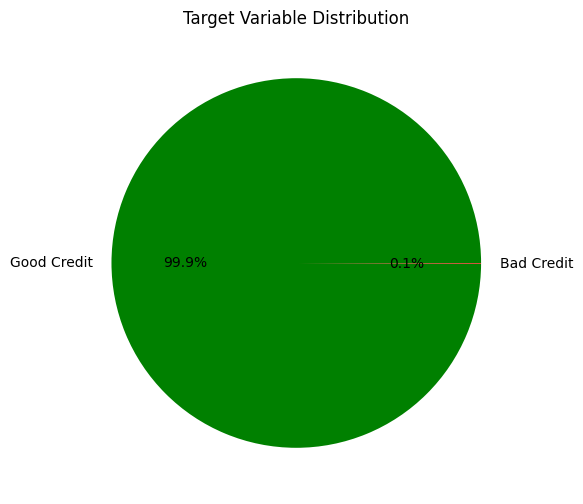

In [130]:
# Checking Class Distribution
print(df['Bad_Credit'].value_counts())

df['Bad_Credit'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['green', 'red'],
    labels=['Good Credit', 'Bad Credit'],
    figsize=(6, 6)
)
plt.title("Target Variable Distribution")
plt.ylabel("")  # Hide y-axis label
plt.show()




**#Findings :**\
1.Since bad credit cases make up only 0.1% of the dataset, this indicates a severe class imbalance problem.\
2.If left unaddressed, machine learning models will likely favor the majority class (good credit) and fail to accurately predict bad credit cases.\
3.Hence we can handle this class imbalance further.

#📌 Step 4: Feature Engineering





In [131]:
# Convert DAYS_BIRTH to Age in Years
df['AGE_YEARS'] = (-df['DAYS_BIRTH']) // 365

In [132]:
#EMPLOYMENT_YEARS
df['EMPLOYMENT_YEARS'] = df['DAYS_EMPLOYED'].apply(lambda x: -x // 365 if x != 365243 else np.nan)


In [134]:
#YEARS_BEFORE_EMPLOYMENT(The difference between Age and Employment Duration)
df['YEARS_BEFORE_EMPLOYMENT'] = df['AGE_YEARS'] - df['EMPLOYMENT_YEARS']


In [135]:
#EMPLOYMENT_STATUS
df['EMPLOYMENT_STATUS'] = df['DAYS_EMPLOYED'].apply(lambda x:
    'Unemployed' if x == 365243 else
    'Short-term' if x > -365*2 else
    'Mid-term' if x > -365*5 else
    'Long-term'
)


In [137]:
 # Employment stability ratio
df['EMPLOYMENT_STABILITY'] = df['EMPLOYMENT_YEARS'] / df['AGE_YEARS']